# [ONLINE NEWS DATASET](http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)

Summarizes a heterogeneous set of features about articles published by [Mashable](https://mashable.com/) in a period of two years. The goal is to predict the **number of shares in social networks (popularity)**.

In [1]:
# imports
import functools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df_original = pd.read_csv('./dataset_online.csv', sep=',', header=0)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

In [3]:
df_original.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [4]:
df_original.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
df_original.columns
df_original.shape
dataset = df_original.replace(0, np.nan)

## Data exploitation

In [6]:
# auxiliar functions
def sum_dict(dictionary):
    return {key: sum(dictionary[key]) for key in dictionary}

def plot_bar(dictionary):
    index = np.arange(len(list(dictionary.keys())))
    plt.bar(index, list(dictionary.values()))
    plt.xticks(index, dictionary.keys(), rotation=30)
    plt.show()
    
df = df_original

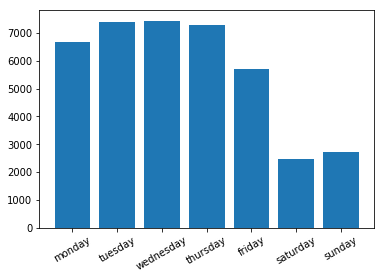

In [7]:
week = {
    'monday': df['weekday_is_monday'],
    'tuesday': df['weekday_is_tuesday'],
    'wednesday': df['weekday_is_wednesday'],
    'thursday': df['weekday_is_thursday'],
    'friday': df['weekday_is_friday'],
    'saturday': df['weekday_is_saturday'],
    'sunday': df['weekday_is_sunday']
}

plot_bar(sum_dict(week))

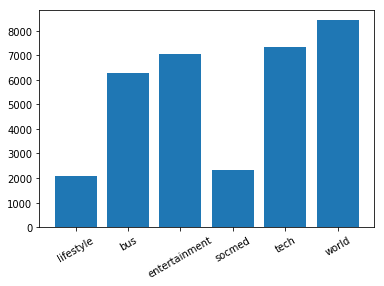

In [8]:
channel = {
    'lifestyle': df['data_channel_is_lifestyle'],
    'bus': df['data_channel_is_bus'],
    'entertainment': df['data_channel_is_entertainment'],
    'socmed': df['data_channel_is_socmed'],
    'tech': df['data_channel_is_tech'],
    'world': df['data_channel_is_world'],
}

# data_channel = pd.DataFrame(data=channel)
plot_bar(sum_dict(channel))

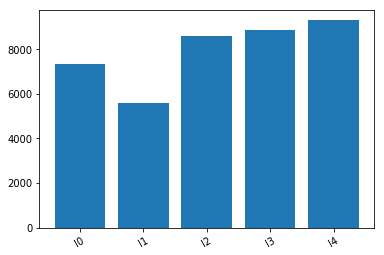

In [9]:
ld = {
    'l0': df['LDA_00'],
    'l1': df['LDA_01'],
    'l2': df['LDA_02'],
    'l3': df['LDA_03'],
    'l4': df['LDA_04'],
}

# lda = pd.DataFrame(data=ld)
plot_bar(sum_dict(ld))

## Feature Selection

In [10]:
# Remove non-predictive atributes
df.drop(['url', 'timedelta'], axis=1, inplace=True)

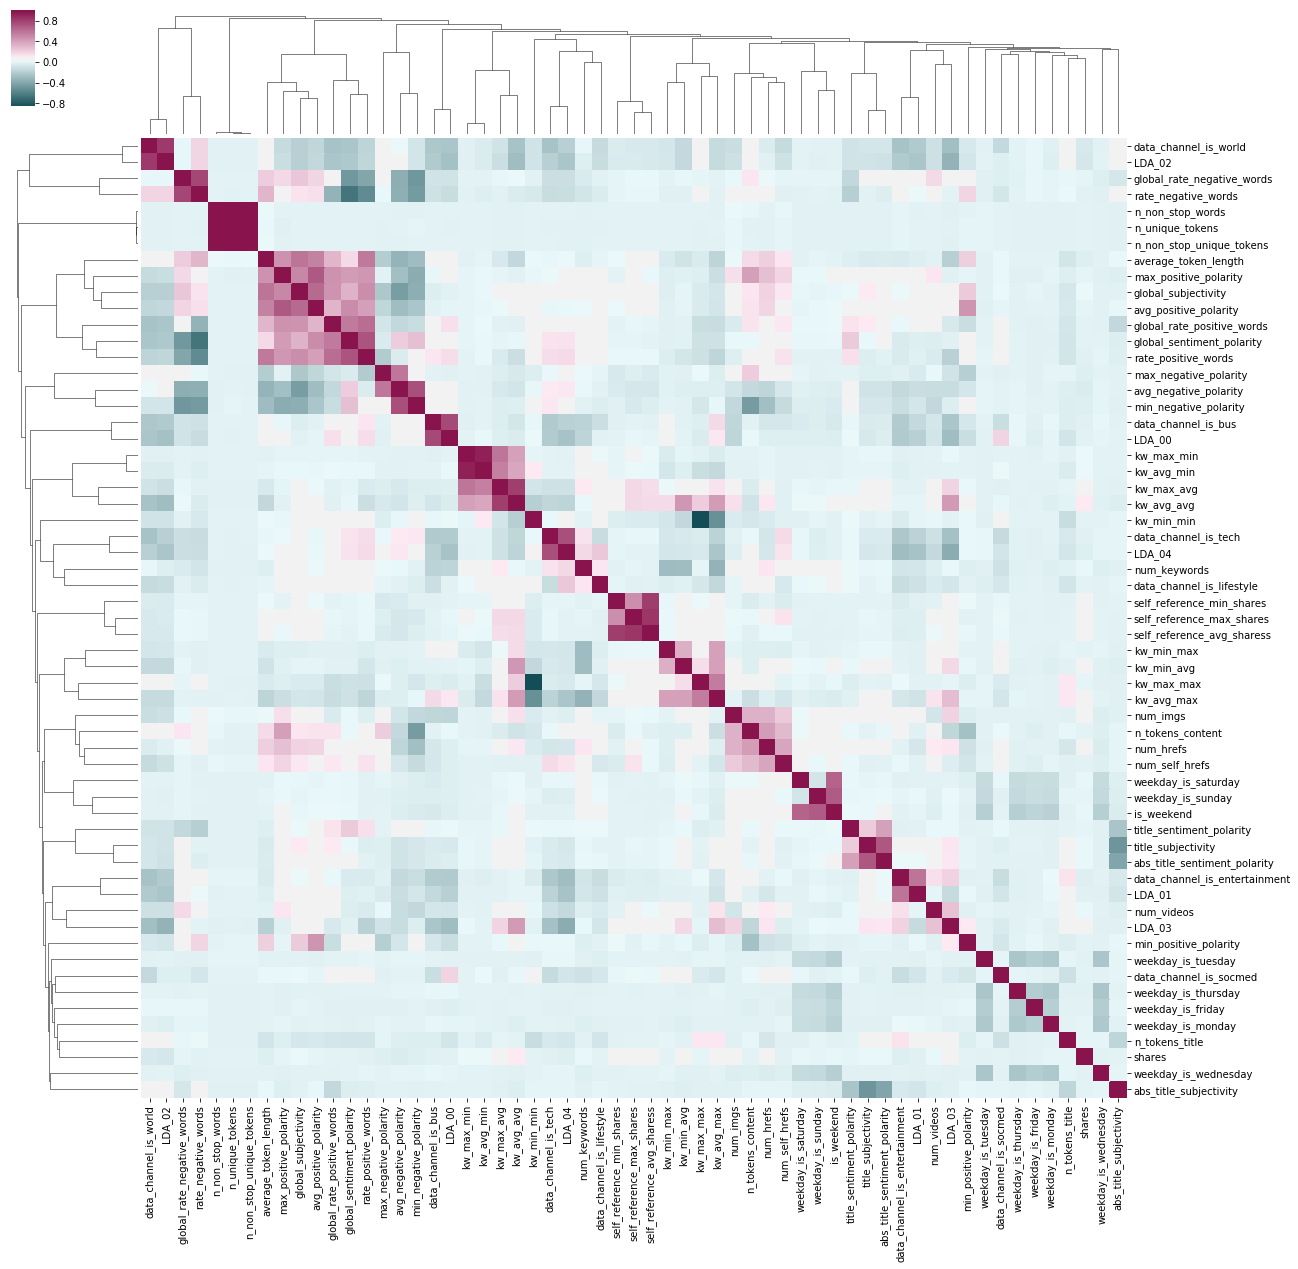

In [11]:
# Clustermap with correlations
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, center="light")
sns.clustermap(df.corr(), figsize=(20, 20), cmap=cmap);

<BarContainer object of 58 artists>

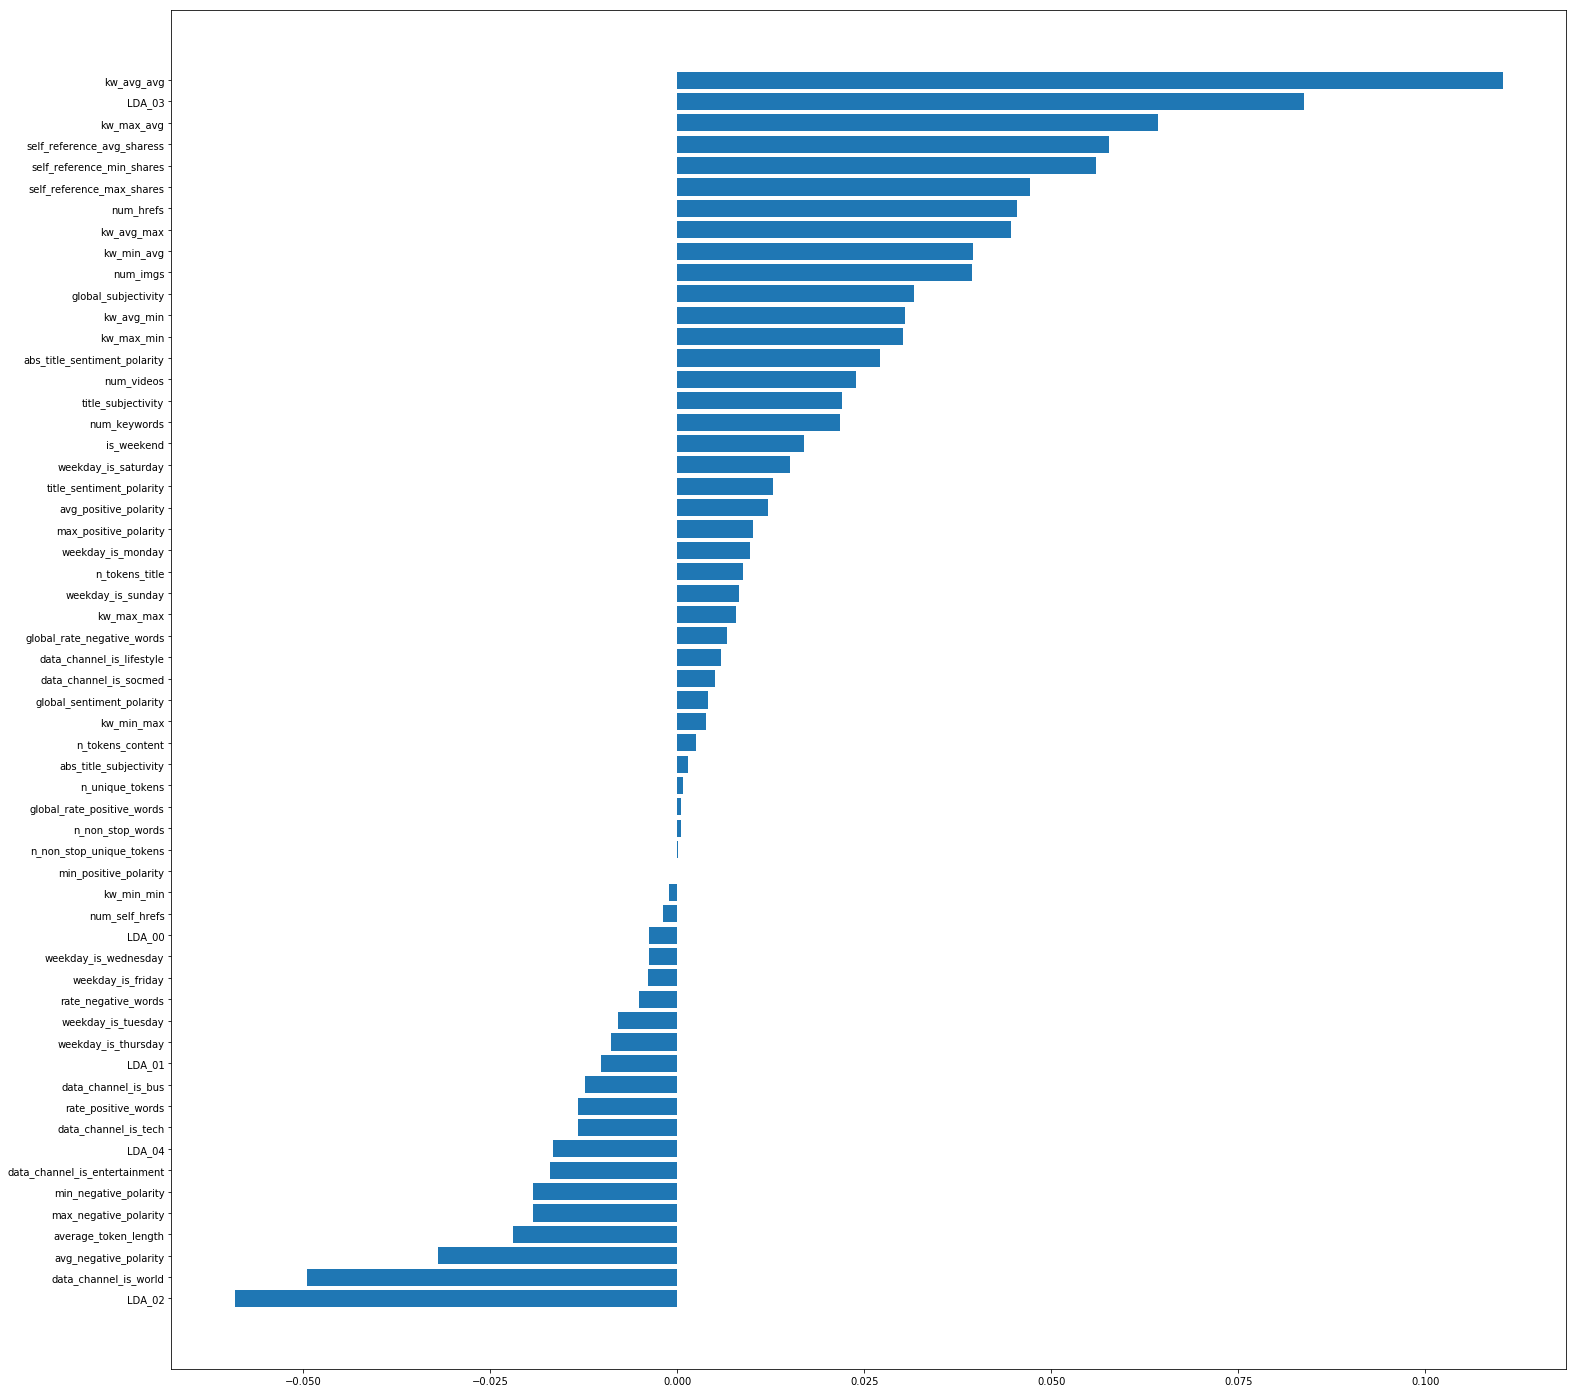

In [12]:
# Correlation to shares
cr = df.corr()['shares'].sort_values(ascending=True)
cr.drop(['shares'], axis=0, inplace=True)
plt.figure(figsize=[25,25])
plt.barh(cr.keys(), cr.values)

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

array = df.values
array_len = len(df.columns)
X = array[:,0:array_len-1]
Y = array[:,array_len-1]

model = ExtraTreesClassifier()
model.fit(X, Y)

/home/eduardonunes/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Feature ranking:
1. feature 22 (0.025417)
2. feature 25 (0.025309)
3. feature 39 (0.024968)
4. feature 41 (0.024962)
5. feature 19 (0.024814)
6. feature 37 (0.024620)
7. feature 38 (0.024561)
8. feature 42 (0.024463)
9. feature 0 (0.024445)
10. feature 24 (0.024340)
11. feature 18 (0.024286)
12. feature 43 (0.024240)
13. feature 4 (0.024212)
14. feature 44 (0.024170)
15. feature 40 (0.024168)
16. feature 1 (0.024098)
17. feature 9 (0.023983)
18. feature 2 (0.023885)
19. feature 5 (0.023807)
20. feature 48 (0.023775)
21. feature 51 (0.023736)
22. feature 45 (0.023547)
23. feature 46 (0.023383)
24. feature 47 (0.023018)
25. feature 52 (0.022655)
26. feature 28 (0.022481)
27. feature 6 (0.022207)
28. feature 26 (0.022035)
29. feature 27 (0.021859)
30. feature 53 (0.021704)
31. feature 23 (0.021326)
32. feature 10 (0.021158)
33. feature 49 (0.020845)
34. feature 50 (0.019706)
35. feature 20 (0.019372)
36. feature 7 (0.019192)
37. feature 54 (0.018269)
38. feature 56 (0.018178)
39. feature 

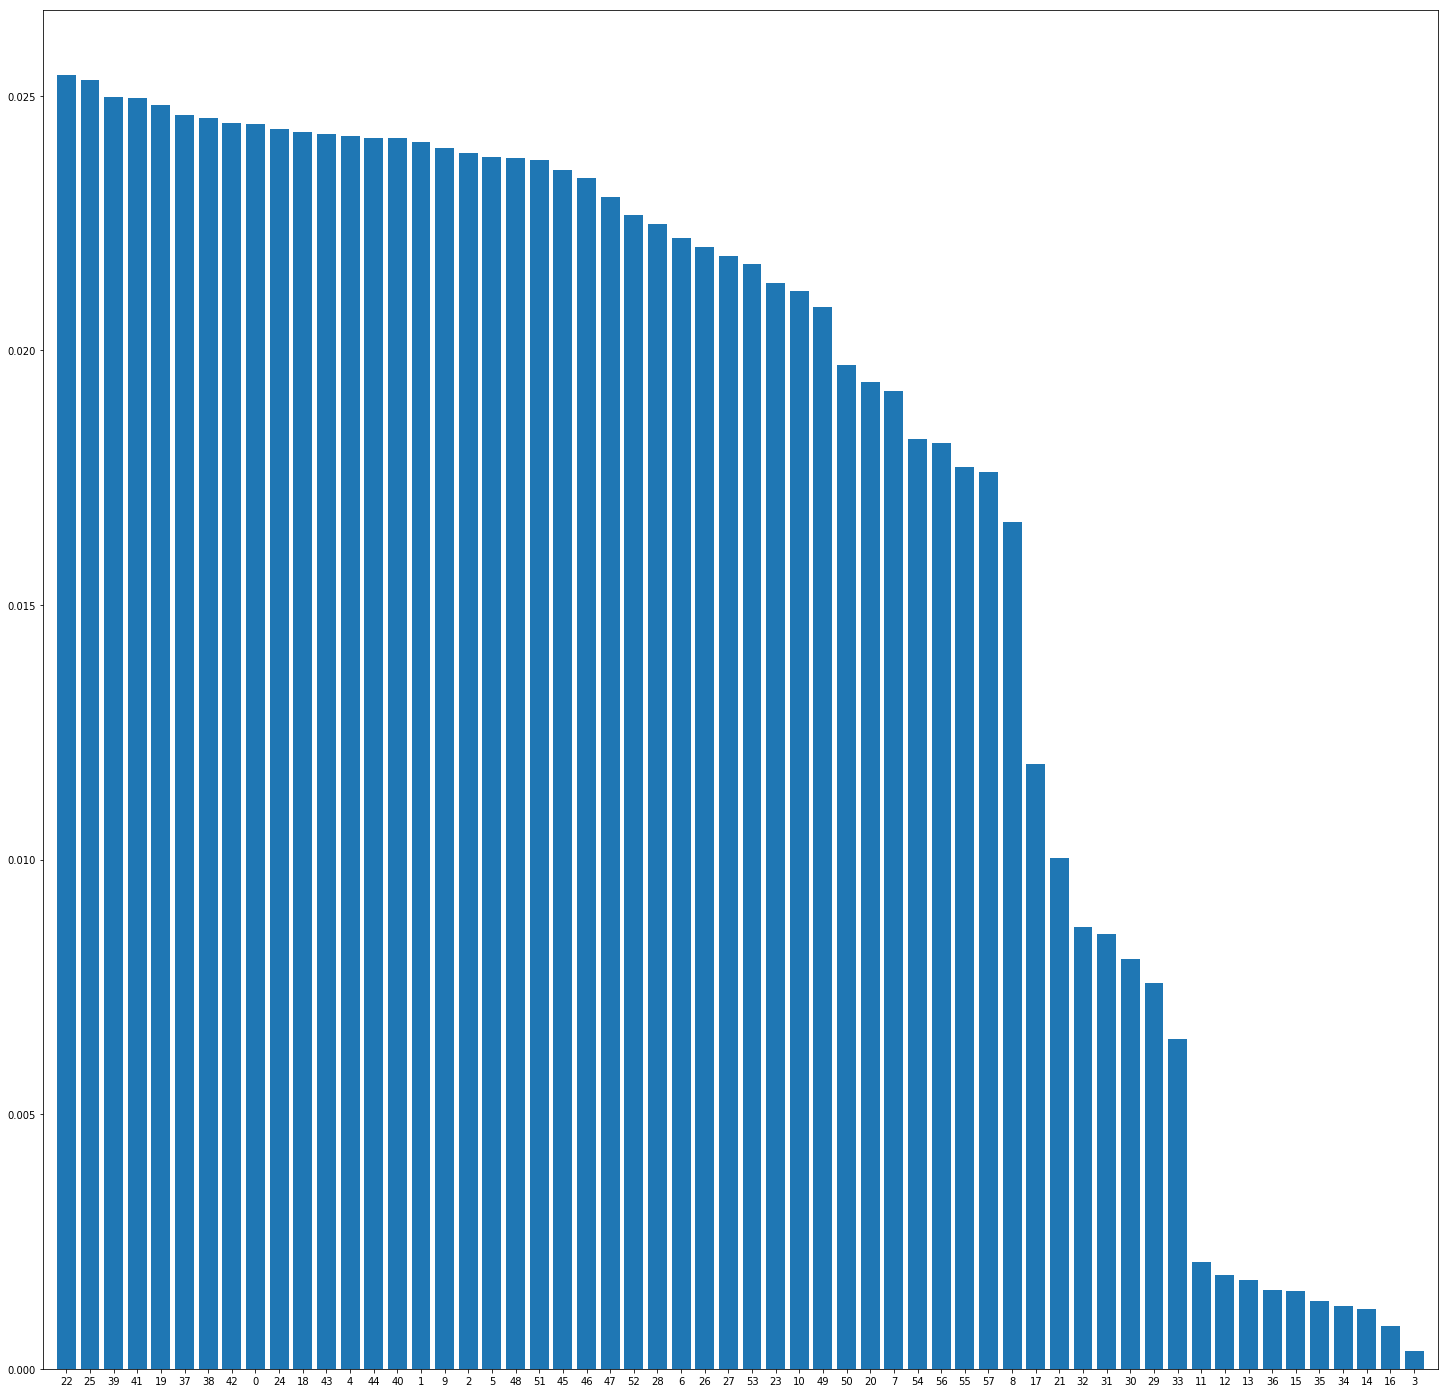

In [14]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=[25,25])
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [15]:
model_sel = SelectFromModel(model, prefit=True)
X_new = model_sel.transform(X)
print(X_new.shape)
print(model_sel.get_support())

(39644, 40)
[ True  True  True False  True  True  True  True False  True  True False
 False False False False False False  True  True  True False  True  True
  True  True  True  True  True False False False False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [16]:
dict_columns = dict(zip(df.columns, model_sel.get_support()))
remove_columns = [k for k,v in dict_columns.items() if v == False]
print(remove_columns)

['n_non_stop_words', 'num_videos', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_max', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']


In [17]:
df.drop(remove_columns, axis=1, inplace=True)
df.to_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 41 columns):
n_tokens_title                  39644 non-null float64
n_tokens_content                39644 non-null float64
n_unique_tokens                 39644 non-null float64
n_non_stop_unique_tokens        39644 non-null float64
num_hrefs                       39644 non-null float64
num_self_hrefs                  39644 non-null float64
num_imgs                        39644 non-null float64
average_token_length            39644 non-null float64
num_keywords                    39644 non-null float64
kw_max_min                      39644 non-null float64
kw_avg_min                      39644 non-null float64
kw_min_max                      39644 non-null float64
kw_avg_max                      39644 non-null float64
kw_min_avg                      39644 non-null float64
kw_max_avg                      39644 non-null float64
kw_avg_avg                      39644 non-null float64
self_refere

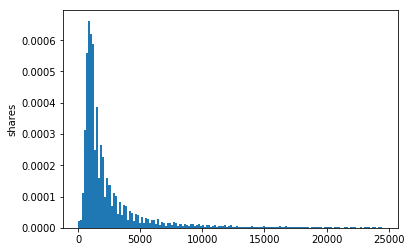

In [18]:
def remove_outliers(df, variable):
    mean = np.median(df[variable])
    std = np.std(df[variable])
    ma = (mean + 2 * std)
    mi = (mean - 2 * std)
    df_new = df[df[variable] < ma]
    df_new = df_new[df_new[variable] > mi]

    return df_new

#x = remove_outliers(df, 'shares')
#plt.hist(x['shares'], density=True, bins=150)
#plt.ylabel('shares');

df_clean = remove_outliers(df, 'shares')

df_clean.to_csv('clean_dataset.csv')

x = df_clean['shares']
plt.hist(x, density=True, bins=150)
plt.ylabel('shares');